In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 选择算法模型
# KNeighborsClassifier分类模型，可以处理分类问题
from sklearn.neighbors import KNeighborsClassifier

In [4]:
# 获取数据
samples = pd.read_excel('films.xlsx')
samples

,电影名称,动作镜头,谈情镜头,类别
0,前任攻略3,1,9,爱情
1,笑傲江湖,21,2,动作
2,战狼2,20,1,动作
3,复仇联盟,23,2,动作
4,星愿,2,16,爱情
5,心花路放,3,15,爱情
6,七月与安生,2,17,爱情
7,他是龙,1,16,爱情
8,红海行动,27,3,动作


In [5]:
# 获取特征集合和标签集合
train = samples[['动作镜头','谈情镜头']]
target = samples['类别']

In [6]:
# 构建算法模型对象
# n_neighbors一般为奇数
knn = KNeighborsClassifier(n_neighbors=5)

In [7]:
# 训练算法模型
knn.fit(train,target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [10]:
train

,动作镜头,谈情镜头
0,1,9
1,21,2
2,20,1
3,23,2
4,2,16
5,3,15
6,2,17
7,1,16
8,27,3


In [13]:
# 预测数据
X_test = np.array([[3,18],[23,5]])
y_ = knn.predict(X_test)

In [14]:
y_

array(['爱情', '动作'], dtype=object)

In [20]:
target

0    爱情
1    动作
2    动作
3    动作
4    爱情
5    爱情
6    爱情
7    爱情
8    动作
Name: 类别, dtype: object

Text(0,0.5,'love')

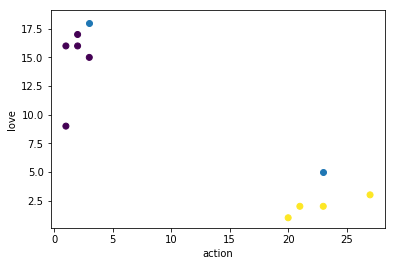

In [23]:
# 绘制样本空间
def transform_target(x):
    if x == '动作':
        return 1
    else:
        return 0
    
number_target = target.map(transform_target)
plt.scatter(train.values[:,0],train.values[:,1],c=number_target)
plt.scatter(X_test[:,0],X_test[:,1])
plt.xlabel('action')
plt.ylabel('love')

In [27]:
# k值的取值范围 不大于样本集数量的平方根
knn1 = KNeighborsClassifier(n_neighbors=3)
knn1.fit(train,target)
X_test = np.array([[3,18],[23,5],[90,1]])
knn1.predict(X_test)

array(['爱情', '动作', '动作'], dtype=object)